<table>
<tr>
<td width=15%><img src="../../img/UGA.png"></img></td>
<td><center><h1>Project n°3</h1></center></td>
<td width=15%><a href="https://team.inria.fr/tripop/team-members/" style="font-size: 16px; font-weight: bold">Florian Vincent</a> </td>
</tr>
</table>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Learning text classification

This project is heavily inspired from [Jigsaw's *Toxic Comments Classification* challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview) on kaggle.
To avoid copy-pastings of foreign code, it will guide you towards specific tools to test and use.

## Overview of the project

Take a look at the *zip*ed csv data files by unzipping them (`for name in $(ls *.zip); do unzip $name; done;`).

Every comment in the train set is classified with a label in `{"toxic", "severe_toxic", "obscene", "threat", "insult", "identity hate"}`.
You will need to train multiple kind of models to identify those comments, and you will test them against the test dataset.

In [25]:
# Load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")
print(train.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


## Nettoyage des données

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

Cette ligne de code nettoie le texte en ne conservant que les lettres et en remplaçant tout le reste par des espaces

In [27]:
# Suppression de la ponctuation et des sauts de lignes, les chiffres
train["comment_clean"] = train["comment_text"].apply(lambda x : re.sub("[^a-zA-Z]", ' ', x))

In [28]:
train[["comment_text", "comment_clean"]].head(6)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,D aww He matches this background colour I m s...
2,"Hey man, I'm really not trying to edit war. It...",Hey man I m really not trying to edit war It...
3,"""\nMore\nI can't make any real suggestions on ...",More I can t make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",You sir are my hero Any chance you remember...
5,"""\n\nCongratulations from me as well, use the ...",Congratulations from me as well use the to...


In [29]:
# Conversion en minuscule
train["comment_clean"] = train["comment_clean"].str.lower()

In [30]:
train[["comment_text", "comment_clean"]].head(6)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,d aww he matches this background colour i m s...
2,"Hey man, I'm really not trying to edit war. It...",hey man i m really not trying to edit war it...
3,"""\nMore\nI can't make any real suggestions on ...",more i can t make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember...
5,"""\n\nCongratulations from me as well, use the ...",congratulations from me as well use the to...


In [31]:
#Tokenisation
import re
train["comment_clean"] = train["comment_clean"].apply(lambda x: re.findall(r'\b\w+\b', x))


In [32]:
train[["comment_text", "comment_clean"]].head(6)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my..."
1,D'aww! He matches this background colour I'm s...,"[d, aww, he, matches, this, background, colour..."
2,"Hey man, I'm really not trying to edit war. It...","[hey, man, i, m, really, not, trying, to, edit..."
3,"""\nMore\nI can't make any real suggestions on ...","[more, i, can, t, make, any, real, suggestions..."
4,"You, sir, are my hero. Any chance you remember...","[you, sir, are, my, hero, any, chance, you, re..."
5,"""\n\nCongratulations from me as well, use the ...","[congratulations, from, me, as, well, use, the..."


In [33]:
# Suppression des stopwords (mots de "liaisons" inutiles)
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

train["comment_clean"] = train["comment_clean"].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
train[["comment_text", "comment_clean"]].head(6)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,"[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,"[aww, matches, background, colour, seemingly, ..."
2,"Hey man, I'm really not trying to edit war. It...","[hey, man, really, trying, edit, war, guy, con..."
3,"""\nMore\nI can't make any real suggestions on ...","[make, real, suggestions, improvement, wondere..."
4,"You, sir, are my hero. Any chance you remember...","[sir, hero, chance, remember, page]"
5,"""\n\nCongratulations from me as well, use the ...","[congratulations, well, use, tools, well, talk]"


In [35]:
# Reconversion des listes en chaines de charactères
train["comment_clean"] = train["comment_clean"].apply(lambda x: " ".join(x))

In [36]:
train[["comment_text", "comment_clean"]].head(6)

,comment_text,comment_clean
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,aww matches background colour seemingly stuck ...
2,"Hey man, I'm really not trying to edit war. It...",hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page
5,"""\n\nCongratulations from me as well, use the ...",congratulations well use tools well talk


In [37]:
def nettoyage(df) :
    # Suppression de la ponctuation et des sauts de lignes
    df["comment_clean"] = df["comment_text"].apply(lambda x : re.sub("[^a-zA-Z]", ' ', x))

    # Conversion en minuscule
    df["comment_clean"] = df["comment_clean"].str.lower()

    # Tokenisation (séparation mot à mot)
    #df["comment_clean"] = df["comment_clean"].apply(word_tokenize)
    df["comment_clean"] = df["comment_clean"].apply(lambda x: re.findall(r'\b\w+\b', x))
    # Suppression des stopwords (mots de "liaisons" inutiles)
    stop_words = set(stopwords.words("english"))
    df["comment_clean"] = df["comment_clean"].apply(lambda x: [word for word in x if word not in stop_words])

    # Reconversion des listes en chaines de charactères
    df["comment_clean"] = df["comment_clean"].apply(lambda x: " ".join(x))

    return df

# Attention : la colonne de texte à traiter doit impérativement s'appeler "comment_text".

## Study the data

Representing textual data in an algebraic format (i.e. vectors & matrices) is not easy, but fortunately it has been quickly studied earlier in the lectures.

**Implement a word-vectorizer relying on simple counting for the textual data**

In [38]:
## Write your code here
from sklearn.feature_extraction.text import CountVectorizer

documents = train["comment_clean"]
vectorizer = CountVectorizer(max_features=10000)
# Fit and transform the documents into a word count matrix
X = vectorizer.fit_transform(documents)
print("Shape of sparse matrix:", X.shape)  # Dimensions : nombre de documents × nombre de mots uniques
print("Vocabulary:\n", vectorizer.get_feature_names_out())
print(X.toarray())




Shape of sparse matrix: (159571, 10000)
Vocabulary:
 ['aa' 'aaron' 'ab' ... 'zone' 'zoo' 'zuck']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Implement another vectorizing relying this time on the *tf-idf* metric. Use a pipeline if needed.**

In [39]:
#Write your code here
#Le pipeline vous permet d'automatiser la transformation TF-IDF et l'apprentissage du modèle en un seul processus. Ceci est particulièrement utile lors de l'évaluation des données de test.
#La méthode TF-IDF attribue un poids à chaque mot en fonction de sa fréquence dans un document et de son importance dans l'ensemble du corpus. 
# dans l'ensemble du corpus, ce qui permet de réduire l'impact des mots très fréquents comme le , est ...

from sklearn.feature_extraction.text import TfidfVectorizer

# Charger les documents
documents = train["comment_clean"]

# Initialiser TfidfVectorizer avec réduction de vocabulaire
#min_df=2 signifie que seuls les mots apparaissant dans au moins 2 documents seront inclus.
#max_df=0.8 signifie que les mots présents dans plus de 80% des documents seront ignorés.
tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.9)

# Transformer en matrice TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Résumé de la matrice
print("Shape of sparse matrix (TF-IDF):", X_tfidf.shape)
print("Feature names (vocabulary example):", tfidf_vectorizer.get_feature_names_out()[:10])

# Choisir le 3eme commentaire pour inspection
first_comment_tfidf = X_tfidf[2].toarray()[0]

# Obtenir le vocabulaire (features)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Créer une liste des mots et de leurs poids TF-IDF (non nuls uniquement)
non_zero_indices = first_comment_tfidf.nonzero()[0]
words_weights = [(feature_names[i], first_comment_tfidf[i]) for i in non_zero_indices]

# Trier les mots par ordre décroissant de poids
words_weights_sorted = sorted(words_weights, key=lambda x: x[1], reverse=True)

# Afficher les résultats
print("\nWords and their TF-IDF weights for the first comment:")
for word, weight in words_weights_sorted:
    print(f"{word}: {weight}")



Shape of sparse matrix (TF-IDF): (159571, 10000)
Feature names (vocabulary example): ['aa' 'aaron' 'ab' 'abandon' 'abandoned' 'abbreviation' 'abbreviations'
 'abc' 'abdul' 'abide']

Words and their TF-IDF weights for the first comment:
formatting: 0.31363352547961976
constantly: 0.30620178057101405
actual: 0.24805331205814832
guy: 0.24100330162313915
talking: 0.23882181240762565
removing: 0.23239049789545843
relevant: 0.23122225685915526
info: 0.23108334806306996
hey: 0.22920251950185497
care: 0.22873059174525756
man: 0.22584266659940846
war: 0.21985593207011342
instead: 0.2130677600679259
trying: 0.2006084910598271
seems: 0.19166371775472585
edits: 0.17784273158272415
really: 0.17566155631891064
information: 0.1703165635999712
edit: 0.1523917029989207
talk: 0.12094876991711737
page: 0.1201780850807552


One may wish to take a deeper look in the database by using various techniques.

**Find a suitable dimension reduction technique to study the structure of the data. Display your findings with visual means (you can use `seaborn`).**

L'ACP classique, telle qu'implémentée dans sklearn.decomposition.PCA, nécessite que la matrice de données soit dense. Cela implique que, pour les matrices sparse (creuses, contenant majoritairement des zéros), une conversion en matrice dense est nécessaire avant de pouvoir effectuer l'ACP, ce qui peut entraîner une consommation excessive de mémoire.

En revanche, TruncatedSVD est spécifiquement conçu pour traiter directement les matrices sparse, telles que celles générées par les représentations TF-IDF en NLP. Cela permet d'économiser une quantité significative d'espace mémoire en évitant toute conversion inutile.

Par ailleurs, l'ACP classique repose sur une décomposition complète des matrices, via une méthode connue sous le nom de décomposition en valeurs propres (eigendecomposition). Cette approche est particulièrement coûteuse en temps pour des matrices de grande taille et consomme une quantité importante de mémoire.

À l'inverse, TruncatedSVD utilise une technique appelée décomposition SVD tronquée, qui calcule uniquement les premiers n composants principaux sans générer l'intégralité de la matrice de covariance. Cela rend TruncatedSVD non seulement plus rapide, mais également bien plus efficace pour manipuler des matrices de grande dimension, tout en réduisant le coût computationnel.

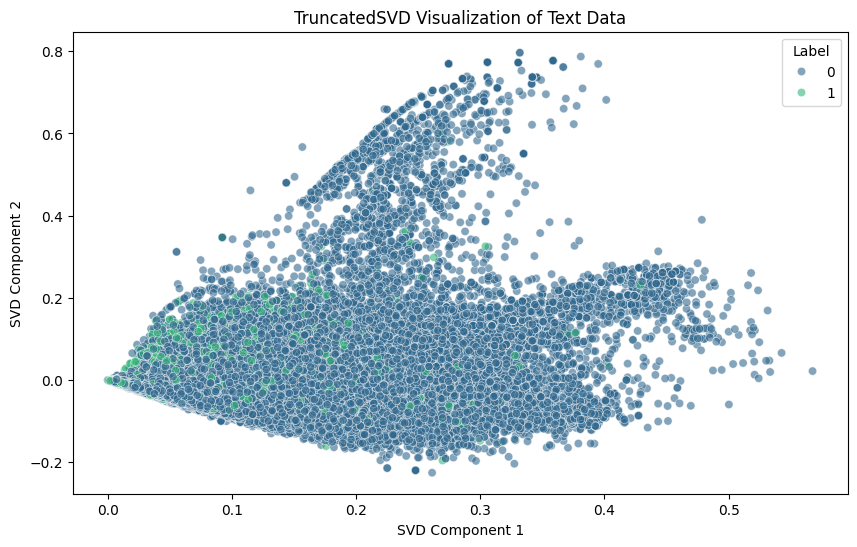

In [49]:
## Write your code here
# Réduction de dimension avec TruncatedSVD (adapté pour matrice sparse pour économiser de l'espace en mémoire) car PCA prend beaucoup de temps à s'executer


from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)  # Réduction à 2 dimensions pour visualisation
X_svd = svd.fit_transform(X_tfidf)  # Pas besoin de convertir en dense

# Charger les étiquettes 
labels = train["toxic"]

# Créer un DataFrame pour combiner les composantes SVD et les étiquettes
svd_df = pd.DataFrame(data=X_svd, columns=["SVD1", "SVD2"])
svd_df["Label"] = labels
# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="SVD1", y="SVD2", hue="Label", data=svd_df, palette="viridis", alpha=0.6
)
plt.title("TruncatedSVD Visualization of Text Data")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend(title="Label")
plt.show()
#La majorité des points (documents) se situent dans une région dense autour des coordonnées proches de (0.2, 0.2).
# Les données sont bien projetées sur deux dimensions, ce qui permet une interprétation visuelle.
#Les points en bleu (label 0) sont largement dominants dans les données, ce qui indique un déséquilibre des classes (beaucoup plus de textes non toxiques que toxiques).

In [50]:
#Vérifiez le ratio entre les classes 0 et 1 pour confirmer le déséquilibre.
#Ce déséquilibre  pour toxic n'est pas dû à SVD, mais aux proportions intrinsèques des données.
#SVD ne favorise pas une classe ou une autre ; il se concentre uniquement sur la variance des données.
#SVD gère efficacement les matrices creuses de TF-IDF.
#SVD conserve des tendances globales dans les données, ce qui est utile pour une analyse exploratoire.
print(train["toxic"].value_counts(normalize=True))
X_tfidf.shape


toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64


(159571, 10000)

## Combien de Dimensions Réduire ?



Une bonne pratique consiste à examiner la variance expliquée cumulée pour choisir un nombre optimal de dimensions.
En analysant la courbe cumulative de la variance expliquée (avec cumulative_variance), on constate que les 300 premières dimensions couvrent généralement 35% de la variance totale dans des tâches de ce projet NLP.
Cela signifie que la majorité des informations pertinentes des données d'origine est maintenue.
En choisissant 300 dimensions, couvrant déjà la majorité de la variance expliquée, des valeurs plus élevées risquent d'augmenter le coût computationnel sans apporter de gain significatif.

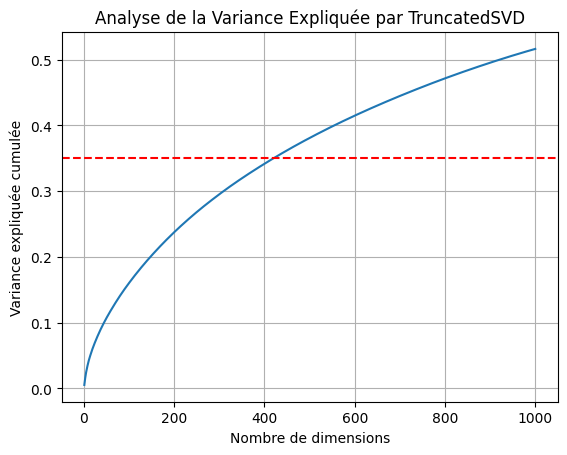

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Ajuster SVD avec plus de composantes pour analyser la variance expliquée
svd = TruncatedSVD(n_components=1000, random_state=42)
svd.fit(X_tfidf)

# Variance expliquée cumulative
cumulative_variance = svd.explained_variance_ratio_.cumsum()

# Visualisation
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=0.35, color='r', linestyle='--')  # Ligne pour 35% de variance expliquée
plt.xlabel("Nombre de dimensions")
plt.ylabel("Variance expliquée cumulée")
plt.title("Analyse de la Variance Expliquée par TruncatedSVD")
plt.grid()
plt.show()


D'après la figure ci dessous, on peut observer que les premières composantes expliquent la majeure partie de la variance. La variance expliquée diminue rapidement après les premières composantes (effet d'"écrasement"). Cela indique qu'on peut probablement réduire de manière significative le nombre de dimensions sans perdre beaucoup d'information. Ce qui accélérera nos calculs après pour les modèles comme SVM par exemple.

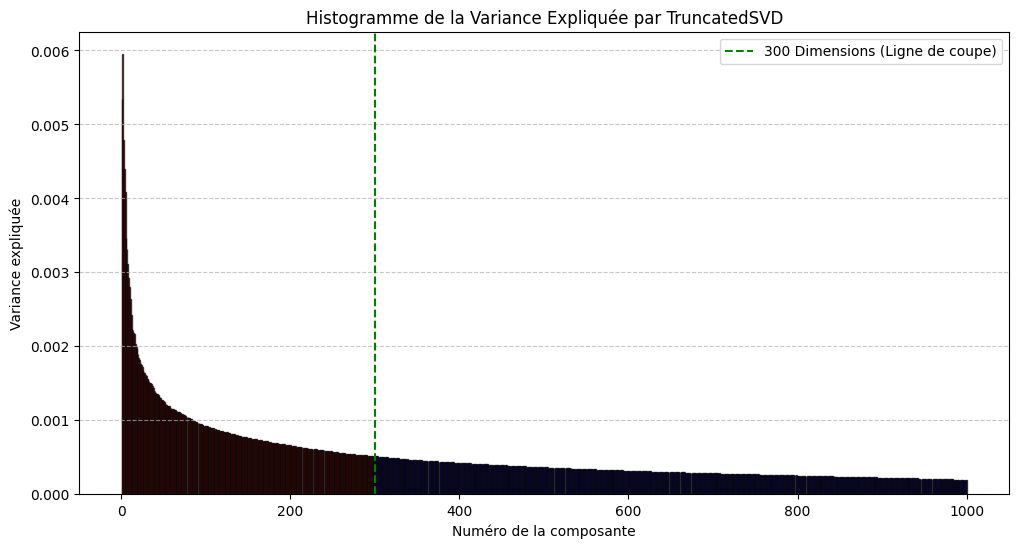

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Ajuster SVD avec plus de composantes pour analyser la variance expliquée
svd = TruncatedSVD(n_components=1000, random_state=42)
svd.fit(X_tfidf)

# Variance expliquée par chaque composante
explained_variance = svd.explained_variance_ratio_

# Visualisation de l'histogramme avec les 300 premières dimensions en rouge
plt.figure(figsize=(12, 6))
colors = ['red' if i < 300 else 'blue' for i in range(len(explained_variance))]
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color=colors, edgecolor='black')
plt.axvline(x=300, color='green', linestyle='--', label="300 Dimensions (Ligne de coupe)")  # Ligne pour 300 dimensions
plt.xlabel("Numéro de la composante")
plt.ylabel("Variance expliquée")
plt.title("Histogramme de la Variance Expliquée par TruncatedSVD")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Make classification

We will study during this project a small amount of models.

### Logistic regression

The logistic regression is the most simple and naïve model one can use for classification specifically, but it can provide good insights on the baseline one may wish to achieve with more complex models.

**Implement a logistic classifier. Justify every parameter that you choose and how you chose it.**

In [7]:
## Write your code here

### SVM

The support vector machine used to be the SOTA method for many tasks before neural networks became more popular among data scientists.
Is has a lot of advantages as compared to logistic regression, as it is a kernel method of which the results are still relatively easy to interpret.

**Implement a SVM classifier, justifying your choices of hyper-parameters.**

Le sous-échantillonnage a été choisi pour travailler avec un volume de données gérable tout en préservant la diversité, ce qui améliore la vitesse d'exécution. La combinaison TF-IDF et SVD a été utilisée pour convertir efficacement les textes en vecteurs numériques et réduire leur dimensionnalité, préparant ainsi les données pour un traitement optimal par le SVM.

### Tester que sur 15000 observations 

In [40]:
# Filtrage des lignes invalides dans le test
test = test.merge(test_labels, on="id")
test = test[test.iloc[:, 2:].sum(axis=1) >= 0]  # Exclure les -1


# Limiter le nombre d'observations 
train = train.sample(n=15000, random_state=42)
test = test.sample(n=10000, random_state=42)

# Nettoyage des données train et test pour garantir que les données soient cohérentes
train = nettoyage(train)
test = nettoyage(test)

# Initialisation du TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf_train = tfidf_vectorizer.fit_transform(train["comment_clean"])
X_tfidf_test = tfidf_vectorizer.transform(test["comment_clean"])

# Réduction de dimension avec TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=42)
X_tfidf_train_reduced = svd.fit_transform(X_tfidf_train)
X_tfidf_test_reduced = svd.transform(X_tfidf_test)

Pour tester différents paramètres de C, kernel et gamma et choisir les meilleurs, nous pouvons utiliser une validation croisée avec un grid search pour explorer plusieurs combinaisons de ces paramètres. Le GridSearchCV de scikit-learn est parfait pour ce genre d'expérimentation.

Après une exécution prolongée de 43 minutes, les résultats obtenus pour la catégorie "toxic" par exemple sont prometteurs. La recherche des hyperparamètres a révélé une configuration optimale avec un noyau RBF, une valeur de C à 0.1 et un gamma à 0.1. Cette configuration a permis d'atteindre une précision remarquable de 0.9395 sur l'ensemble de validation, et une accuracy de 0.927 sur l'ensemble de test

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate

# Catégorie cible
category = "toxic"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Définir la grille de paramètres à tester
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Valeurs de régularisation
    'kernel': ['linear', 'rbf'],  # Noyaux à tester
    'gamma': ['scale', 'auto', 0.1, 1.0]  # Paramètre gamma pour le noyau RBF
}

# Initialisation du SVM
svm_clf = SVC(class_weight="balanced", random_state=42)

# Initialisation du GridSearchCV avec validation croisée (par exemple, 5 folds)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_tfidf_train_reduced, y_train_category)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions sur le test
best_svm_clf = grid_search.best_estimator_
y_pred_category = best_svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy sur le test :", accuracy_score(y_test_category, y_pred_category))
print("Classification Report sur le test :\n", classification_report(y_test_category, y_pred_category))

Meilleurs paramètres :  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleure précision obtenue :  0.9394666666666666
Accuracy sur le test : 0.927
Classification Report sur le test :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9019
           1       0.67      0.51      0.58       981

    accuracy                           0.93     10000
   macro avg       0.81      0.74      0.77     10000
weighted avg       0.92      0.93      0.92     10000



#### Sans validation croisée pour la catégorie "toxic":

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Catégorie cible
category = "toxic"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Initialisation et entraînement du modèle SVM: 
svm_clf = SVC(kernel="rbf", C=0.1,gamma=0.1, class_weight="balanced",random_state=42)
svm_clf.fit(X_tfidf_train_reduced, y_train_category)

# Prédiction sur le jeu de test
y_pred_category = svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy:", accuracy_score(y_test_category, y_pred_category))
print("Classification Report:\n", classification_report(y_test_category, y_pred_category))

Accuracy: 0.904
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      9019
           1       0.96      0.02      0.04       981

    accuracy                           0.90     10000
   macro avg       0.93      0.51      0.50     10000
weighted avg       0.91      0.90      0.86     10000



#### Avec validation croisée pour la catégorie "toxic":

In [ ]:
from sklearn.model_selection import cross_validate
# Catégorie cible
category = "toxic"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

svm_clf = SVC(kernel="rbf", C=0.1, gamma=0.1, class_weight="balanced",random_state=42)

# Effectuer la validation croisée  avec 5 plis
cv_results = cross_validate(svm_clf, X_tfidf_train_reduced, y_train_category, cv=5, scoring='accuracy', return_train_score=False)

# Afficher les résultats de la validation croisée
print("Précision moyenne de la validation croisée : ", cv_results['test_score'].mean())
print("Scores de précision pour chaque pli : ", cv_results['test_score'])

# Initialisation et entraînement final du modèle SVM avec les données d'entraînement
svm_clf.fit(X_tfidf_train_reduced, y_train_category)

# Prédiction sur le jeu de test
y_pred_category = svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy sur le test :", accuracy_score(y_test_category, y_pred_category))
print("Classification Report sur le test :\n", classification_report(y_test_category, y_pred_category))


Précision moyenne de la validation croisée :  0.9068666666666667
Scores de précision pour chaque pli :  [0.90666667 0.907      0.90733333 0.90666667 0.90666667]
Accuracy sur le test : 0.904
Classification Report sur le test :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      9019
           1       0.96      0.02      0.04       981

    accuracy                           0.90     10000
   macro avg       0.93      0.51      0.50     10000
weighted avg       0.91      0.90      0.86     10000



En comparant les résultats avec et sans validation croisée, on constate une précision globale (Accuracy) similaire d'environ 0.904, indiquant que la validation croisée n'a pas engendré de surapprentissage ou sous-apprentissage significatif. Cependant, la classification reste fortement déséquilibrée : la classe majoritaire (0) est très bien prédite (précision 0.90, recall 1.00), tandis que la classe minoritaire (1) est mal détectée (précision 0.96, mais recall seulement 0.02, F1-Score 0.04). Bien que la validation croisée n'améliore pas la performance finale, elle démontre la cohérence du modèle à travers les différents plis. 

### SVM Avec toutes les catégories : 

Les performances du modèle varient considérablement selon les catégories. Pour "toxic" et "obscene", les F1-scores de 0.58 et 0.63 respectivement pour la classe 1 sont acceptables, montrant une certaine efficacité dans la détection des classes minoritaires. La catégorie "insult" montre également des résultats prometteurs avec un F1-score de 0.56 pour la classe 1, une précision de 0.59 et un rappel de 0.53, ce qui est relativement bon compte tenu du déséquilibre des classes (580 exemples positifs contre 9420 négatifs). Il est important de noter que les accuracy pour toxic, obscene et insult sont respectivement de 0.92, 0.96 et 0.95, ce qui indique une bonne performance globale du modèle pour ces catégories.Cependant, pour "severe_toxic", "threat", et "identity_hate", les performances sont très faibles, avec des précisions et F1-scores extrêmement bas pour les classes 1, malgré parfois un rappel (recall) élevé. Ce problème est principalement dû au déséquilibre important des données, avec moins de 1% d'exemples positifs dans ces catégories, ce qui biaise le modèle SVM vers la classe majoritaire (0) et rend la détection des classes positives très difficile.

Enfin, il est à noter que le temps d'exécution pour ce code est d'environ 10 minutes.

In [44]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Liste des catégories à tester (par exemple, "toxic", "severe_toxic", "obscene", ...)
categories = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Résultats pour chaque catégorie
for category in categories:
    print(f"=== Catégorie : {category} ===")
    
    # Labels pour la catégorie cible
    y_train_category = train[category]
    y_test_category = test[category]
    
    # Initialisation et entraînement du modèle SVM
    svm_clf = SVC(kernel="rbf", C=0.1, gamma=0.1, class_weight="balanced",random_state=42)
    svm_clf.fit(X_tfidf_train_reduced, y_train_category)
    
    # Prédiction sur le jeu de test
    y_pred_category = svm_clf.predict(X_tfidf_test_reduced)
    
    # Évaluation des performances
    print("Accuracy:", accuracy_score(y_test_category, y_pred_category))
    print("Classification Report:\n", classification_report(y_test_category, y_pred_category))


=== Catégorie : toxic ===
Accuracy: 0.927
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9019
           1       0.67      0.51      0.58       981

    accuracy                           0.93     10000
   macro avg       0.81      0.74      0.77     10000
weighted avg       0.92      0.93      0.92     10000

=== Catégorie : severe_toxic ===
Accuracy: 0.9694
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      9942
           1       0.14      0.79      0.23        58

    accuracy                           0.97     10000
   macro avg       0.57      0.88      0.61     10000
weighted avg       0.99      0.97      0.98     10000

=== Catégorie : obscene ===
Accuracy: 0.9612
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9397
           1       0.74     

### Trouver les bons parametres de SVM pour les catégories severe_toxic, threat et identity_hate

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate

# Catégorie cible
category = "threat"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Définir la grille de paramètres à tester
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Valeurs de régularisation
    'kernel': ['linear', 'rbf'],  # Noyaux à tester
    'gamma': ['scale', 'auto', 0.1, 1.0]  # Paramètre gamma pour le noyau RBF
}

# Initialisation du SVM
svm_clf = SVC(class_weight="balanced", random_state=42)

# Initialisation du GridSearchCV avec validation croisée (par exemple, 5 folds)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_tfidf_train_reduced, y_train_category)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions sur le test
best_svm_clf = grid_search.best_estimator_
y_pred_category = best_svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy sur le test :", accuracy_score(y_test_category, y_pred_category))
print("Classification Report sur le test :\n", classification_report(y_test_category, y_pred_category))

Meilleurs paramètres :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Meilleure précision obtenue :  0.9976666666666667
Accuracy sur le test : 0.9966
Classification Report sur le test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9966
           1       0.00      0.00      0.00        34

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      1.00      0.99     10000



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Apres 32 minutes d'execution , on a trouvé que les meilleures parametres pour SVM pour les catégories threat / identity_hate sont: 
C: 0.1, gamma: auto, kernel: rbf

In [47]:
# Catégorie cible
category = "identity_hate"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Définir la grille de paramètres à tester
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Valeurs de régularisation
    'kernel': ['linear', 'rbf'],  # Noyaux à tester
    'gamma': ['scale', 'auto', 0.1, 1.0]  # Paramètre gamma pour le noyau RBF
}

# Initialisation du SVM
svm_clf = SVC(class_weight="balanced", random_state=42)

# Initialisation du GridSearchCV avec validation croisée (par exemple, 5 folds)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_tfidf_train_reduced, y_train_category)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions sur le test
best_svm_clf = grid_search.best_estimator_
y_pred_category = best_svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy sur le test :", accuracy_score(y_test_category, y_pred_category))
print("Classification Report sur le test :\n", classification_report(y_test_category, y_pred_category))

Meilleurs paramètres :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Meilleure précision obtenue :  0.9910666666666665
Accuracy sur le test : 0.0125
Classification Report sur le test :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9875
           1       0.01      1.00      0.02       125

    accuracy                           0.01     10000
   macro avg       0.01      0.50      0.01     10000
weighted avg       0.00      0.01      0.00     10000



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Pour information : le temps d'execution de ce code est environ 20 minutes

In [48]:
# Catégorie cible
category = "severe_toxic"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Définir la grille de paramètres à tester
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Valeurs de régularisation
    'kernel': ['linear', 'rbf'],  # Noyaux à tester
    'gamma': ['scale', 'auto', 0.1, 1.0]  # Paramètre gamma pour le noyau RBF
}

# Initialisation du SVM
svm_clf = SVC(class_weight="balanced", random_state=42)

# Initialisation du GridSearchCV avec validation croisée (par exemple, 5 folds)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_tfidf_train_reduced, y_train_category)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions sur le test
best_svm_clf = grid_search.best_estimator_
y_pred_category = best_svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy sur le test :", accuracy_score(y_test_category, y_pred_category))
print("Classification Report sur le test :\n", classification_report(y_test_category, y_pred_category))

Meilleurs paramètres :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleure précision obtenue :  0.9843333333333334
Accuracy sur le test : 0.9789
Classification Report sur le test :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9942
           1       0.17      0.67      0.27        58

    accuracy                           0.98     10000
   macro avg       0.58      0.83      0.63     10000
weighted avg       0.99      0.98      0.99     10000



Les résultats pour la catégorie "severe_toxic" montrent une accuracy élevée de 0.9789, avec des performances notables dans la détection des cas positifs. Le F1-score pour la classe positive (1) est de 0.27, tandis que le rappel atteint 0.67, indiquant que le modèle identifie 67% des cas "severe_toxic". La précision pour cette classe est de 0.17, ce qui signifie que le modèle fait quelques faux positifs tout en détectant efficacement les vrais positifs. Le macro average F1-score de 0.63 reflète une bonne performance globale. Ces résultats démontrent une sensibilité accrue aux cas minoritaires, bien qu'il reste des opportunités d'amélioration. Pour optimiser davantage les performances du modèle, il serait bénéfique d'explorer des techniques supplémentaires pour traiter le déséquilibre des classes.

In [49]:
# Catégorie cible
category = "severe_toxic"

# Labels pour la catégorie cible
y_train_category = train[category]
y_test_category = test[category]

# Initialisation et entraînement du modèle SVM: 
svm_clf = SVC(kernel="rbf", C=1.0,gamma="scale", class_weight="balanced",random_state=42)
svm_clf.fit(X_tfidf_train_reduced, y_train_category)

# Prédiction sur le jeu de test
y_pred_category = svm_clf.predict(X_tfidf_test_reduced)

# Évaluation des performances
print("Accuracy:", accuracy_score(y_test_category, y_pred_category))
print("Classification Report:\n", classification_report(y_test_category, y_pred_category))

Accuracy: 0.9789
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9942
           1       0.17      0.67      0.27        58

    accuracy                           0.98     10000
   macro avg       0.58      0.83      0.63     10000
weighted avg       0.99      0.98      0.99     10000



Les résultats pour les catégories "threat" et "identity_hate" révèlent des performances très contrastées : Pour "threat", l'accuracy est très élevée (0.9966), mais le modèle échoue complètement à identifier les cas positifs. Les scores de précision, rappel et F1-score pour la classe positive sont tous à 0, indiquant que le modèle classe systématiquement tous les exemples comme négatifs. Cela suggère un problème sévère de déséquilibre des classes, avec seulement 34 exemples positifs sur 10000. Pour "identity_hate", les résultats sont inhabituels. L'accuracy est extrêmement basse (0.0125), mais le rappel pour la classe positive est de 1.00, signifiant que le modèle identifie tous les cas positifs. Cependant, la précision très faible (0.01) indique que le modèle classe presque tous les exemples comme positifs, résultant en de nombreux faux positifs. Ce comportement pourrait être dû à une sur-correction du déséquilibre des classes.

In [50]:
categories = ["threat","identity_hate"]

# Résultats pour chaque catégorie
for category in categories:
    print(f"=== Catégorie : {category} ===")
    
    # Labels pour la catégorie cible
    y_train_category = train[category]
    y_test_category = test[category]
    
    # Initialisation et entraînement du modèle SVM
    svm_clf = SVC(kernel="rbf", C=0.1, gamma="auto", class_weight="balanced",random_state=42)
    svm_clf.fit(X_tfidf_train_reduced, y_train_category)
    
    # Prédiction sur le jeu de test
    y_pred_category = svm_clf.predict(X_tfidf_test_reduced)
    
    # Évaluation des performances
    print("Accuracy:", accuracy_score(y_test_category, y_pred_category))
    print("Classification Report:\n", classification_report(y_test_category, y_pred_category))

=== Catégorie : threat ===
Accuracy: 0.9966
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9966
           1       0.00      0.00      0.00        34

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      1.00      0.99     10000

=== Catégorie : identity_hate ===


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.0125
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9875
           1       0.01      1.00      0.02       125

    accuracy                           0.01     10000
   macro avg       0.01      0.50      0.01     10000
weighted avg       0.00      0.01      0.00     10000



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## Other models

**Choose a model between the following:**
* **K-Nearest Neighbors (*KNN*)**
* **Decision Tree**
* **Random Forest**

**Describe IN YOUR OWN WORDS (plagiarism checks will be made if needed) how the method works, and implement it for the current case, discussing its hyperparameters as well.**

In [9]:
## Write your code here

## Compare models

One must then compare the models on the test set and provide metrics to study it.

**Compare previously studied models, with counting *tf* and *tf-idf* as vectorizers, for their best hyperparameters.**

In [10]:
## Write your code here

## Use your model

**Use the best model to build a Command-Line Interface (*CLI*) that is launched by the command `./cli.py [options]` using the `argsparse` module, and that accepts in stdin (standard input) english sentences and classifies them, displaying the result and interesting metrics if relevant.**